## Flights Project - Lilach Hirsh 

# Lab - working with online data 

In this Lab , you will load , clean and store online flights data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
from datetime import date
%matplotlib inline

In [2]:
import requests
import json


# Load the data

In [3]:
r = requests.get("https://data.gov.il/api/3/action/datastore_search?resource_id=e83f763b-b7d7-479e-b172-ae981ddc6de5&limit=5000")

In [4]:
res = json.loads(r.content)

In [5]:
df = pd.DataFrame(res['result']['records'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968 entries, 0 to 1967
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   _id       1968 non-null   int64 
 1   CHOPER    1968 non-null   object
 2   CHFLTN    1968 non-null   object
 3   CHOPERD   1968 non-null   object
 4   CHSTOL    1968 non-null   object
 5   CHPTOL    1968 non-null   object
 6   CHAORD    1968 non-null   object
 7   CHLOC1    1968 non-null   object
 8   CHLOC1D   1968 non-null   object
 9   CHLOC1TH  1968 non-null   object
 10  CHLOC1T   1968 non-null   object
 11  CHLOC1CH  1968 non-null   object
 12  CHLOCCT   1968 non-null   object
 13  CHTERM    1968 non-null   int64 
 14  CHCINT    784 non-null    object
 15  CHCKZN    784 non-null    object
 16  CHRMINE   1968 non-null   object
 17  CHRMINH   1968 non-null   object
dtypes: int64(2), object(16)
memory usage: 276.9+ KB


## display the first rows 

In [7]:
df.head(10)

,_id,CHOPER,CHFLTN,CHOPERD,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1TH,CHLOC1T,CHLOC1CH,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE,CHRMINH
0,1,W4,6404,WIZZ AIR MALTA,2024-06-01T19:40:00,2024-06-01T20:01:00,D,MXP,MILAN-MALPENSA,מילאנו,MILAN,איטליה,ITALY,3,12-16,A,DEPARTED,המריאה
1,2,W4,6042,WIZZ AIR MALTA,2024-06-01T19:40:00,2024-06-01T20:12:00,D,FCO,ROME - FIUMICINO,רומא,ROME,איטליה,ITALY,3,12-16,A,DEPARTED,המריאה
2,3,IZ,416,ARKIA ISRAELI AIRLINES,2024-06-01T20:30:00,2024-06-01T20:17:00,A,BUS,BATUMI,בטומי,BATUMI,גיאורגיה,GEORGIA,3,None,None,LANDED,נחתה
3,4,EK,2471,EMIRATES,2024-06-01T19:50:00,2024-06-01T20:19:00,D,DXB,DUBAI,דובאי,DUBAI,איחוד האמירויות הערב,UNITED ARAB EMIRATES,3,34-37,B,DEPARTED,המריאה
4,5,FZ,1126,FLYDUBAI,2024-06-01T19:50:00,2024-06-01T20:19:00,D,DXB,DUBAI,דובאי,DUBAI,איחוד האמירויות הערב,UNITED ARAB EMIRATES,3,34-37,B,DEPARTED,המריאה
5,6,LV,599,AIRZENA,2024-06-01T20:25:00,2024-06-01T20:23:00,A,TBS,TBILISI,טביליסי,TBILISI,גיאורגיה,GEORGIA,3,None,None,LANDED,נחתה
6,7,IZ,1845,ARKIA ISRAELI AIRLINES,2024-06-01T20:20:00,2024-06-01T20:24:00,D,ETM,RAMON,אילת - רמון,RAMON,ישראל,ISRAEL,1,301-305,A,DEPARTED,המריאה
7,8,BZ,751,BLUE BIRD AIRWAYS,2024-06-01T20:40:00,2024-06-01T20:30:00,A,HER,HERAKLION,הרקליון,HERAKLION,יוון,GREECE,3,None,None,LANDED,נחתה
8,9,IZ,820,ARKIA ISRAELI AIRLINES,2024-06-01T20:40:00,2024-06-01T20:34:00,A,ETM,RAMON,אילת - רמון,RAMON,ישראל,ISRAEL,1,None,None,LANDED,נחתה
9,10,BZ,701,BLUE BIRD AIRWAYS,2024-06-01T21:00:00,2024-06-01T20:51:00,A,ATH,ATHENS,אתונה,ATHENS,יוון,GREECE,3,None,None,LANDED,נחתה


### display the last 10 rows - What's wrong? 

In [8]:
df.tail(10) 

,_id,CHOPER,CHFLTN,CHOPERD,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1TH,CHLOC1T,CHLOC1CH,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE,CHRMINH
1958,1959,BZ,251,BLUE BIRD AIRWAYS,2024-06-05T19:05:00,2024-06-05T19:05:00,A,BCN,BARCELONA,ברצלונה,BARCELONA,ספרד,SPAIN,3,None,None,NOT FINAL,לא סופי
1959,1960,LY,5104,EL AL ISRAEL AIRLINES,2024-06-05T19:20:00,2024-06-05T19:20:00,A,BUS,BATUMI,בטומי,BATUMI,גיאורגיה,GEORGIA,3,None,None,NOT FINAL,לא סופי
1960,1961,LY,5130,EL AL ISRAEL AIRLINES,2024-06-05T19:25:00,2024-06-05T19:25:00,A,RMO,CHISINAU,קישינב,CHISINAU,מולדוביה,MOLDOVA,3,None,None,NOT FINAL,לא סופי
1961,1962,LY,543,EL AL ISRAEL AIRLINES,2024-06-05T19:30:00,2024-06-05T19:30:00,D,ATH,ATHENS,אתונה,ATHENS,יוון,GREECE,3,None,None,ON TIME,בזמן
1962,1963,IZ,827,ARKIA ISRAELI AIRLINES,2024-06-05T19:40:00,2024-06-05T19:40:00,D,ETM,RAMON,אילת - רמון,RAMON,ישראל,ISRAEL,1,None,None,ON TIME,בזמן
1963,1964,W4,6404,WIZZ AIR MALTA,2024-06-05T19:40:00,2024-06-05T19:40:00,D,MXP,MILAN-MALPENSA,מילאנו,MILAN,איטליה,ITALY,3,None,None,ON TIME,בזמן
1964,1965,EK,2471,EMIRATES,2024-06-05T19:50:00,2024-06-05T19:50:00,D,DXB,DUBAI,דובאי,DUBAI,איחוד האמירויות הערב,UNITED ARAB EMIRATES,3,None,None,ON TIME,בזמן
1965,1966,FZ,1126,FLYDUBAI,2024-06-05T19:50:00,2024-06-05T19:50:00,D,DXB,DUBAI,דובאי,DUBAI,איחוד האמירויות הערב,UNITED ARAB EMIRATES,3,None,None,ON TIME,בזמן
1966,1967,LY,2367,EL AL ISRAEL AIRLINES,2024-06-05T20:00:00,2024-06-05T20:00:00,D,BUD,BUDAPEST,בודפשט,BUDAPEST,הונגריה,HUNGARY,3,None,None,ON TIME,בזמן
1967,1968,6H,891,ISRAIR AIRLINES,2024-06-05T20:00:00,2024-06-05T20:00:00,D,TBS,TBILISI,טביליסי,TBILISI,גיאורגיה,GEORGIA,1,None,None,ON TIME,בזמן


In [9]:
## conclusion : The data looks normal

# clean the data

format the current date with underscore separation (%d_%m_%y)

In [15]:
today= date.today()
x = today.strftime('%d_%m_%y')

Drop the _id column 

In [17]:
df = df.drop('_id', axis=1)

save the raw data (add the current date to the file name) 

In [20]:
df.to_csv(f'raw_data_{x}.csv', index=False)

In [ ]:
df= pd.read_csv('raw_data_01_06_24.csv')

select the airline code and name without duplicates (CHOPER,CHOPERD)

In [21]:
df_airlines = df[['CHOPER', 'CHOPERD']]

In [23]:
df_airlines.drop_duplicates().reset_index(drop=True)

,CHOPER,CHOPERD
0,W4,WIZZ AIR MALTA
1,IZ,ARKIA ISRAELI AIRLINES
2,EK,EMIRATES
3,FZ,FLYDUBAI
4,LV,AIRZENA
...,...,...
59,MU,CHINA EASTERN AIRLINES Co. Ltd
60,RRR,ROYAL AIR FORCE
61,OU,CROATIA AIR
62,EW,EUROWINGS


Load the file airlines.csv and merge it with a new data and save the file 'airline.csv'

In [24]:
airlines = pd.read_csv('airlines.csv')

In [28]:
New_airlines = pd.concat([airlines, df_airlines], axis=0, ignore_index=True).drop_duplicates()


In [31]:
New_airlines.to_csv(f'New_airlines_{x}.csv', index=False)

Drop the Airline name column 

In [32]:
df = df.drop('CHOPERD', axis=1)

Do the same task with airports (CHLOC1,CHLOC1D) and save the file 'airports.csv'

In [34]:
df_airports = df[['CHLOC1', 'CHLOC1D']]

In [35]:
df_airports.drop_duplicates().reset_index(drop=True)

,CHLOC1,CHLOC1D
0,MXP,MILAN-MALPENSA
1,FCO,ROME - FIUMICINO
2,BUS,BATUMI
3,DXB,DUBAI
4,TBS,TBILISI
...,...,...
71,SKD,SAMARKAND
72,VNO,VILNIUS INTL
73,BGY,BERGAMO
74,JMK,MIKONOS


In [37]:
airports = pd.read_csv('airports.csv')

In [40]:
New_airports = pd.concat([airports, df_airports], axis=0, ignore_index=True).drop_duplicates()

In [44]:
New_airports.to_csv(f'airports {x}.csv', index=False)

drop the hebrew columns 'CHLOC1TH','CHLOC1CH','CHRMINH'

In [45]:
df = df.drop('CHLOC1TH', axis=1)
df = df.drop('CHLOC1CH', axis=1)
df = df.drop('CHRMINH', axis=1)

### rename the columns 

In [47]:
df.rename(columns = {'CHOPER':'Airline', 'CHFLTN':'FlightNum', 'CHSTOL':'PlanTime', 'CHPTOL':'ActualTime', 'CHAORD':'Direction', 'CHLOC1':'Airport', 'CHLOC1T':'City','CHLOCCT':'Country', 'CHTERM':'Terminal', 'CHRMINE':'Status'}, inplace=True)

In [48]:
df = df.drop('CHLOC1D', axis=1)

Change the PlanTime and ActualTime columns type to np.datetime64

In [50]:
df['PlanTime'] = pd.to_datetime(df['PlanTime'])
df['ActualTime'] = pd.to_datetime(df['ActualTime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968 entries, 0 to 1967
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Airline     1968 non-null   object        
 1   FlightNum   1968 non-null   object        
 2   PlanTime    1968 non-null   datetime64[ns]
 3   ActualTime  1968 non-null   datetime64[ns]
 4   Direction   1968 non-null   object        
 5   Airport     1968 non-null   object        
 6   City        1968 non-null   object        
 7   Country     1968 non-null   object        
 8   Terminal    1968 non-null   int64         
 9   CHCINT      784 non-null    object        
 10  CHCKZN      784 non-null    object        
 11  Status      1968 non-null   object        
dtypes: datetime64[ns](2), int64(1), object(9)
memory usage: 184.6+ KB


Save the clean data 

In [52]:
df.to_csv(f'clean_data {x}.csv', index=False)

update the file final.csv with departed, landed and canceled flights only

In [5]:
final= pd.read_csv('final.csv')

In [55]:
Status = ['LANDED', 'CANCELED', 'DEPARTED']

In [56]:
df_Status = df[df.Status.isin(Status)]

In [58]:
New_final = pd.concat([final, df_Status], axis=0, ignore_index=True).drop_duplicates()

In [61]:
New_final.to_csv(f'New_final {x}.csv', index=False)

Add a new column for total delay in minutes

In [62]:
P_time = pd.to_datetime(df["PlanTime"])
A_time = pd.to_datetime(df["ActualTime"])

In [63]:
time_diff = (A_time - P_time).dt.total_seconds() / 60

In [64]:
df["DelayTime"]=time_diff

What is the average delay for departed flights

In [67]:
np.ceil(df.DelayTime.mean())

8.0

## Create 5 different visualization with your insights.

In [21]:
Clean_Data_01_06_24 = pd.read_csv('C:\pyhthon\Python Project\clean_data 01_06_24.csv')

<Axes: title={'center': 'Count Status'}, xlabel='Status'>

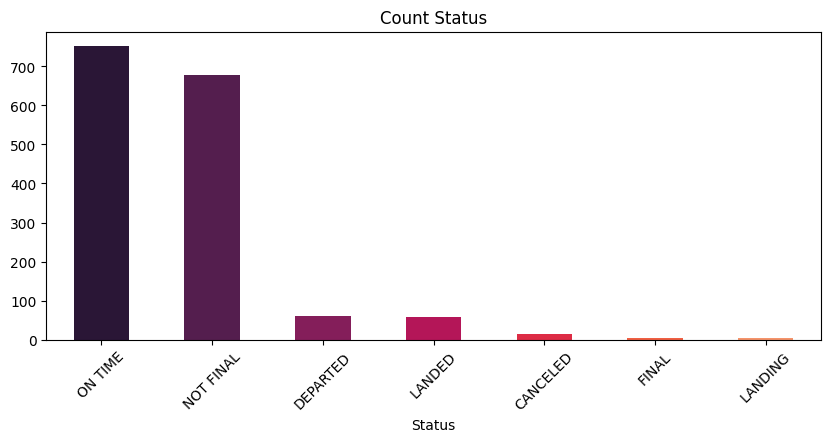

In [22]:
Status_Flights=Clean_Data_01_06_24.groupby('Status')['Airline'].count().sort_values(ascending=False)
rocket=sb.color_palette('rocket',8)
Status_Flights.plot(kind="bar",figsize=(10,4),title ='Count Status',color=rocket, rot=45,)

In [23]:
Status_Flights

Status
ON TIME      752
NOT FINAL    678
DEPARTED      61
LANDED        59
CANCELED      15
FINAL          4
LANDING        4
Name: Airline, dtype: int64

In [ ]:
# insight : About 50% of flights arrive on time

C:\Users\ASUS1\AppData\Local\Temp\ipykernel_6604\2396112097.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data=Clean_Data_01_06_24, x='Terminal', palette='rocket')


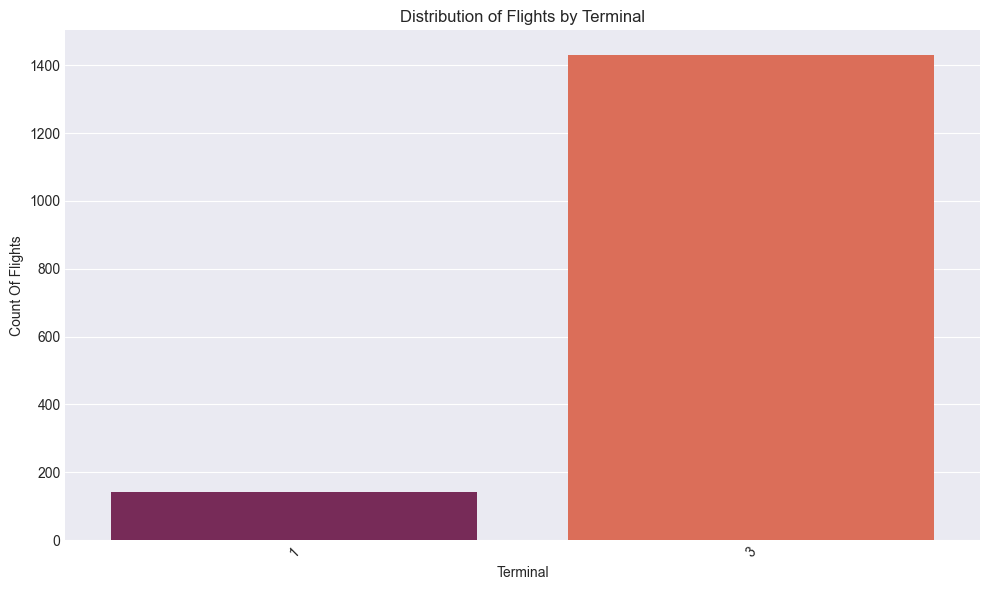

In [31]:
plt.figure(figsize=(10, 6))
sb.countplot(data=Clean_Data_01_06_24, x='Terminal', palette='rocket')
plt.title('Distribution of Flights by Terminal')
plt.xlabel('Terminal')
plt.ylabel('Count Of Flights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('plot3.png')
plt.show()

In [7]:
count=Clean_Data_01_06_24.groupby('Country')['Airport'].count().sort_values(ascending=False)

In [12]:
mask=count.head(10)

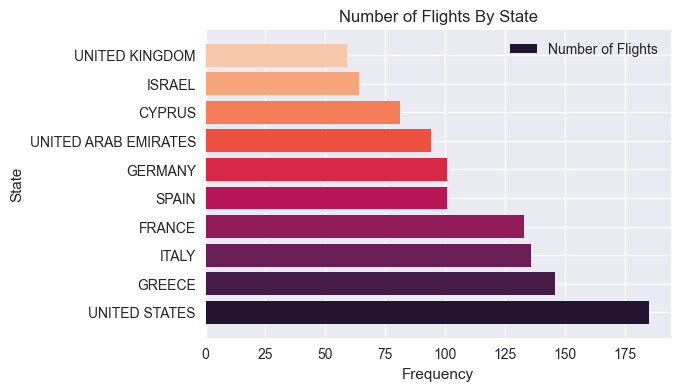

In [13]:
pallate_rocket=sb.color_palette('rocket',10)

plt.figure(figsize=(6,4))
plt.style.use('seaborn-v0_8')
plt.barh(mask.index,mask,color=pallate_rocket,label="Number of Flights")
plt.title("Number of Flights By State")
plt.ylabel("State")
plt.xlabel("Frequency")
plt.legend()
plt.show()

In [12]:
P_time = pd.to_datetime(Clean_Data_01_06_24["PlanTime"])
A_time = pd.to_datetime(Clean_Data_01_06_24["ActualTime"])

In [27]:
Clean_Data_01_06_24["DelayTime"] = (A_time - P_time).dt.total_seconds() / 60

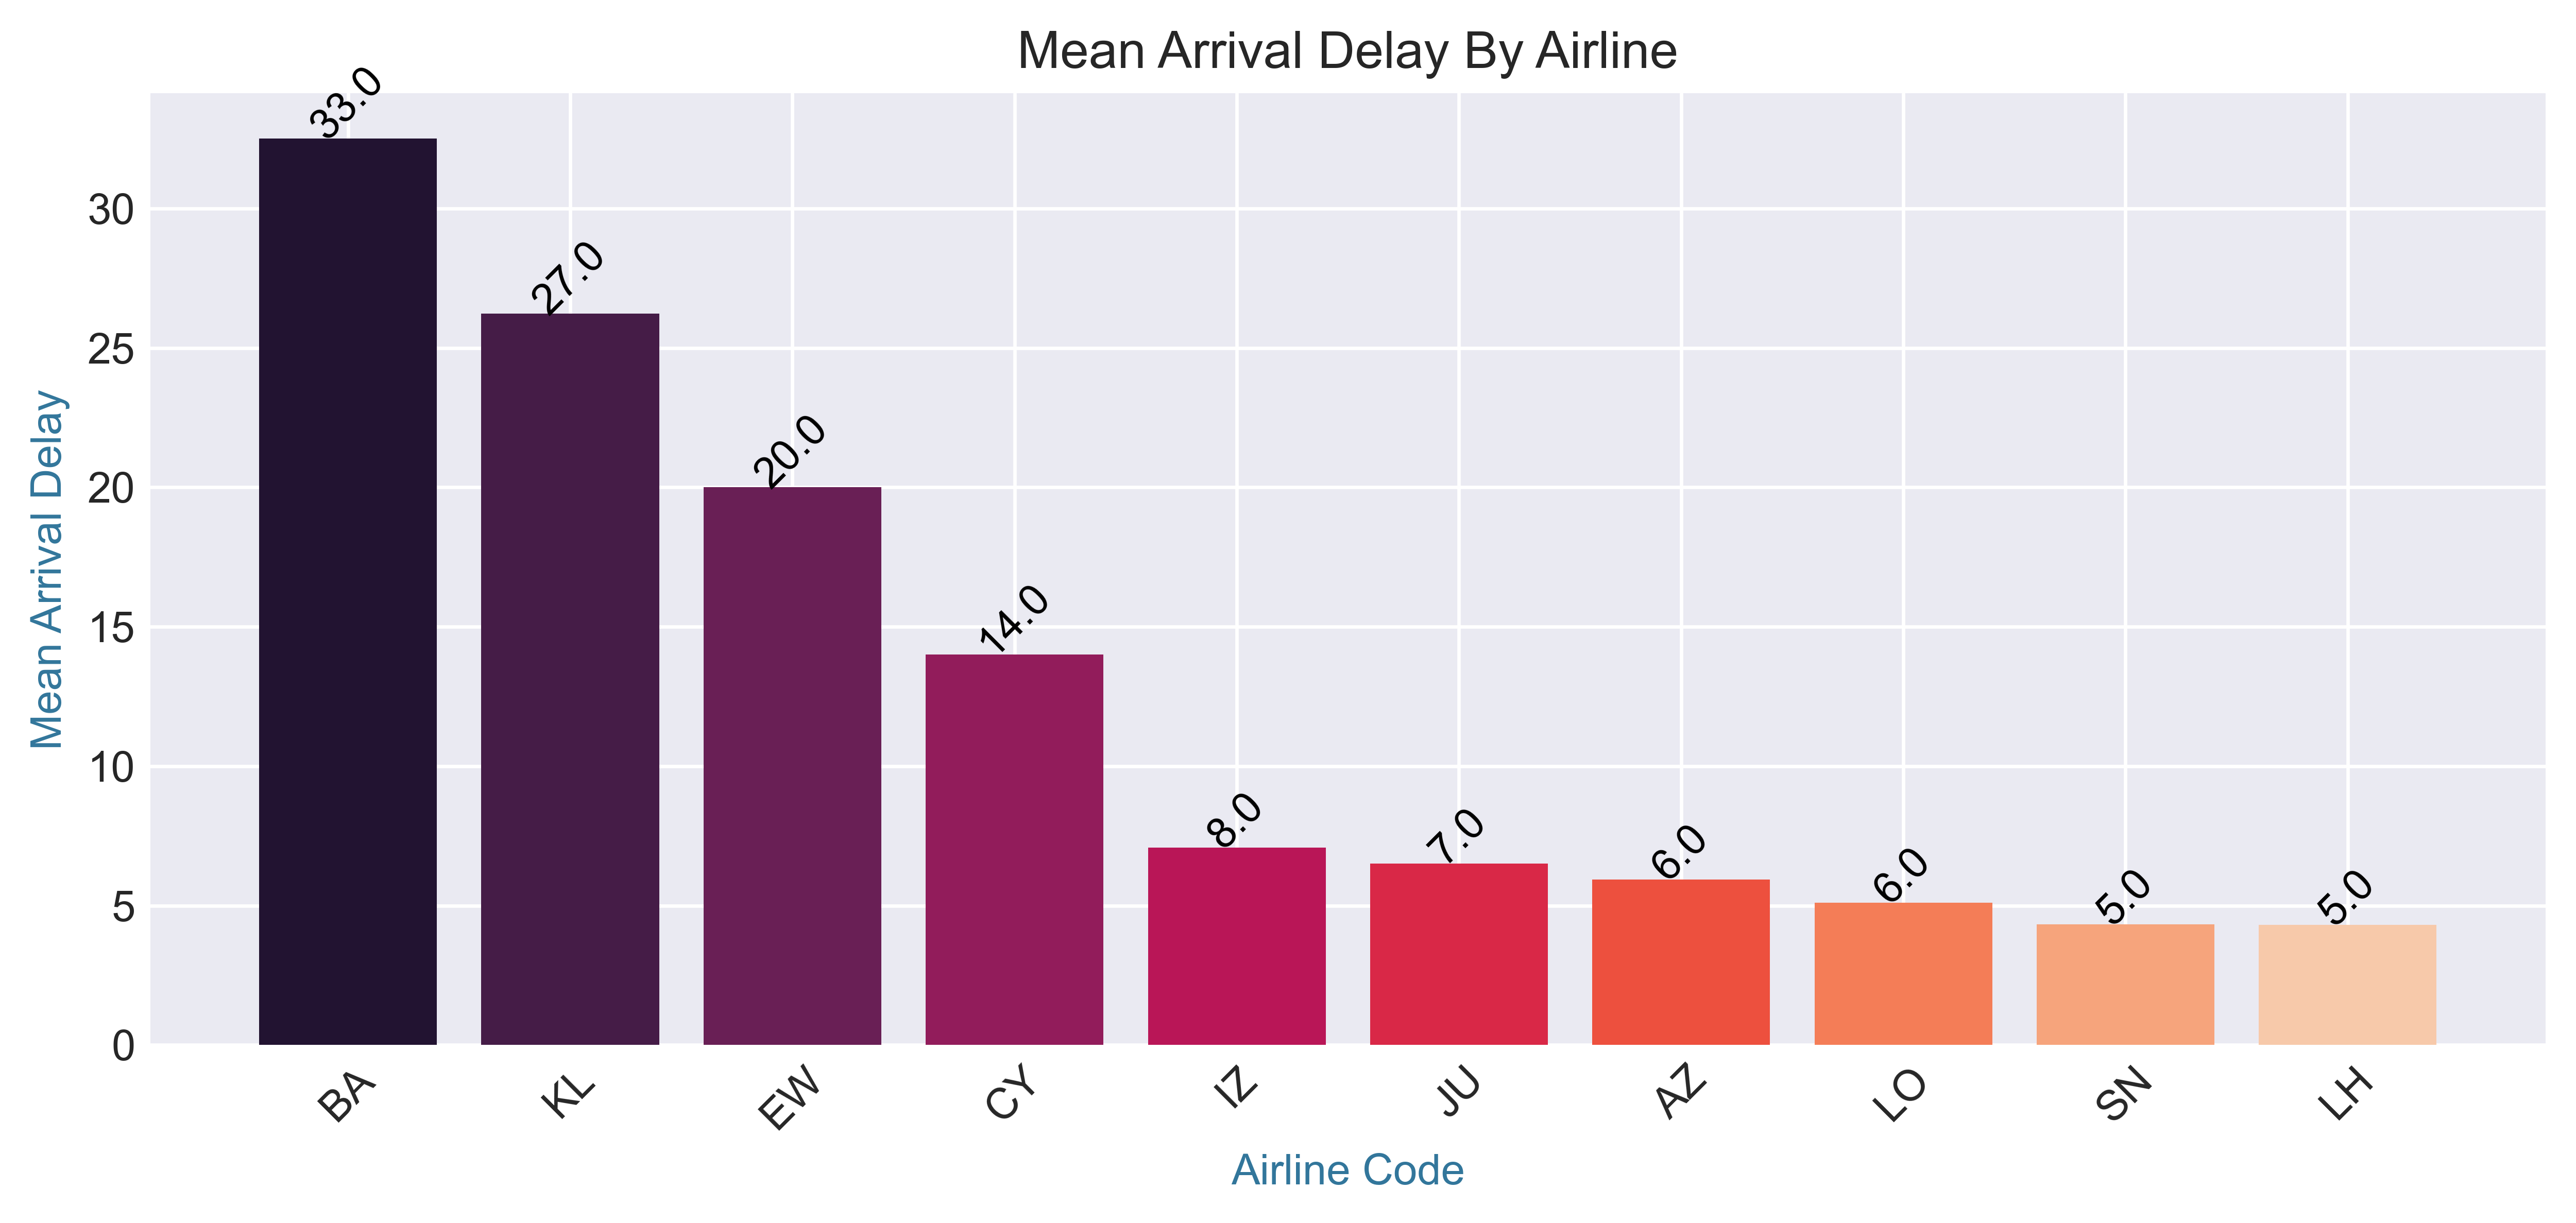

In [29]:
MM=Clean_Data_01_06_24.groupby('Airline')['DelayTime'].mean().sort_values(ascending=False)
mean_delay=MM.head(10)

pallate_rocket=sb.color_palette('rocket',10)

plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(10,4),dpi=600)
plt.bar(mean_delay.index,mean_delay,color=pallate_rocket,label='Mean Arrival Delay')
plt.title('Mean Arrival Delay By Airline')
plt.xlabel('Airline Code',color='#32769B')
plt.ylabel('Mean Arrival Delay',color='#32769B')
plt.xticks(rotation=45)

for i,j in zip(mean_delay.index,mean_delay):
    plt.annotate(str(np.ceil(j)),xy=(i,j),fontsize=10,color='#000000',ha='center',rotation=45 )

plt.show()

In [14]:
Top10_Flights=Clean_Data_01_06_24.groupby('Airline')['FlightNum'].count().sort_values(ascending=False)

In [15]:
Top10_F=Top10_Flights.head(10)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'LY'),
  Text(1, 0, 'IZ'),
  Text(2, 0, '6H'),
  Text(3, 0, 'SK'),
  Text(4, 0, 'AM'),
  Text(5, 0, 'DL'),
  Text(6, 0, 'EK'),
  Text(7, 0, 'B6'),
  Text(8, 0, 'AF'),
  Text(9, 0, 'A3')])

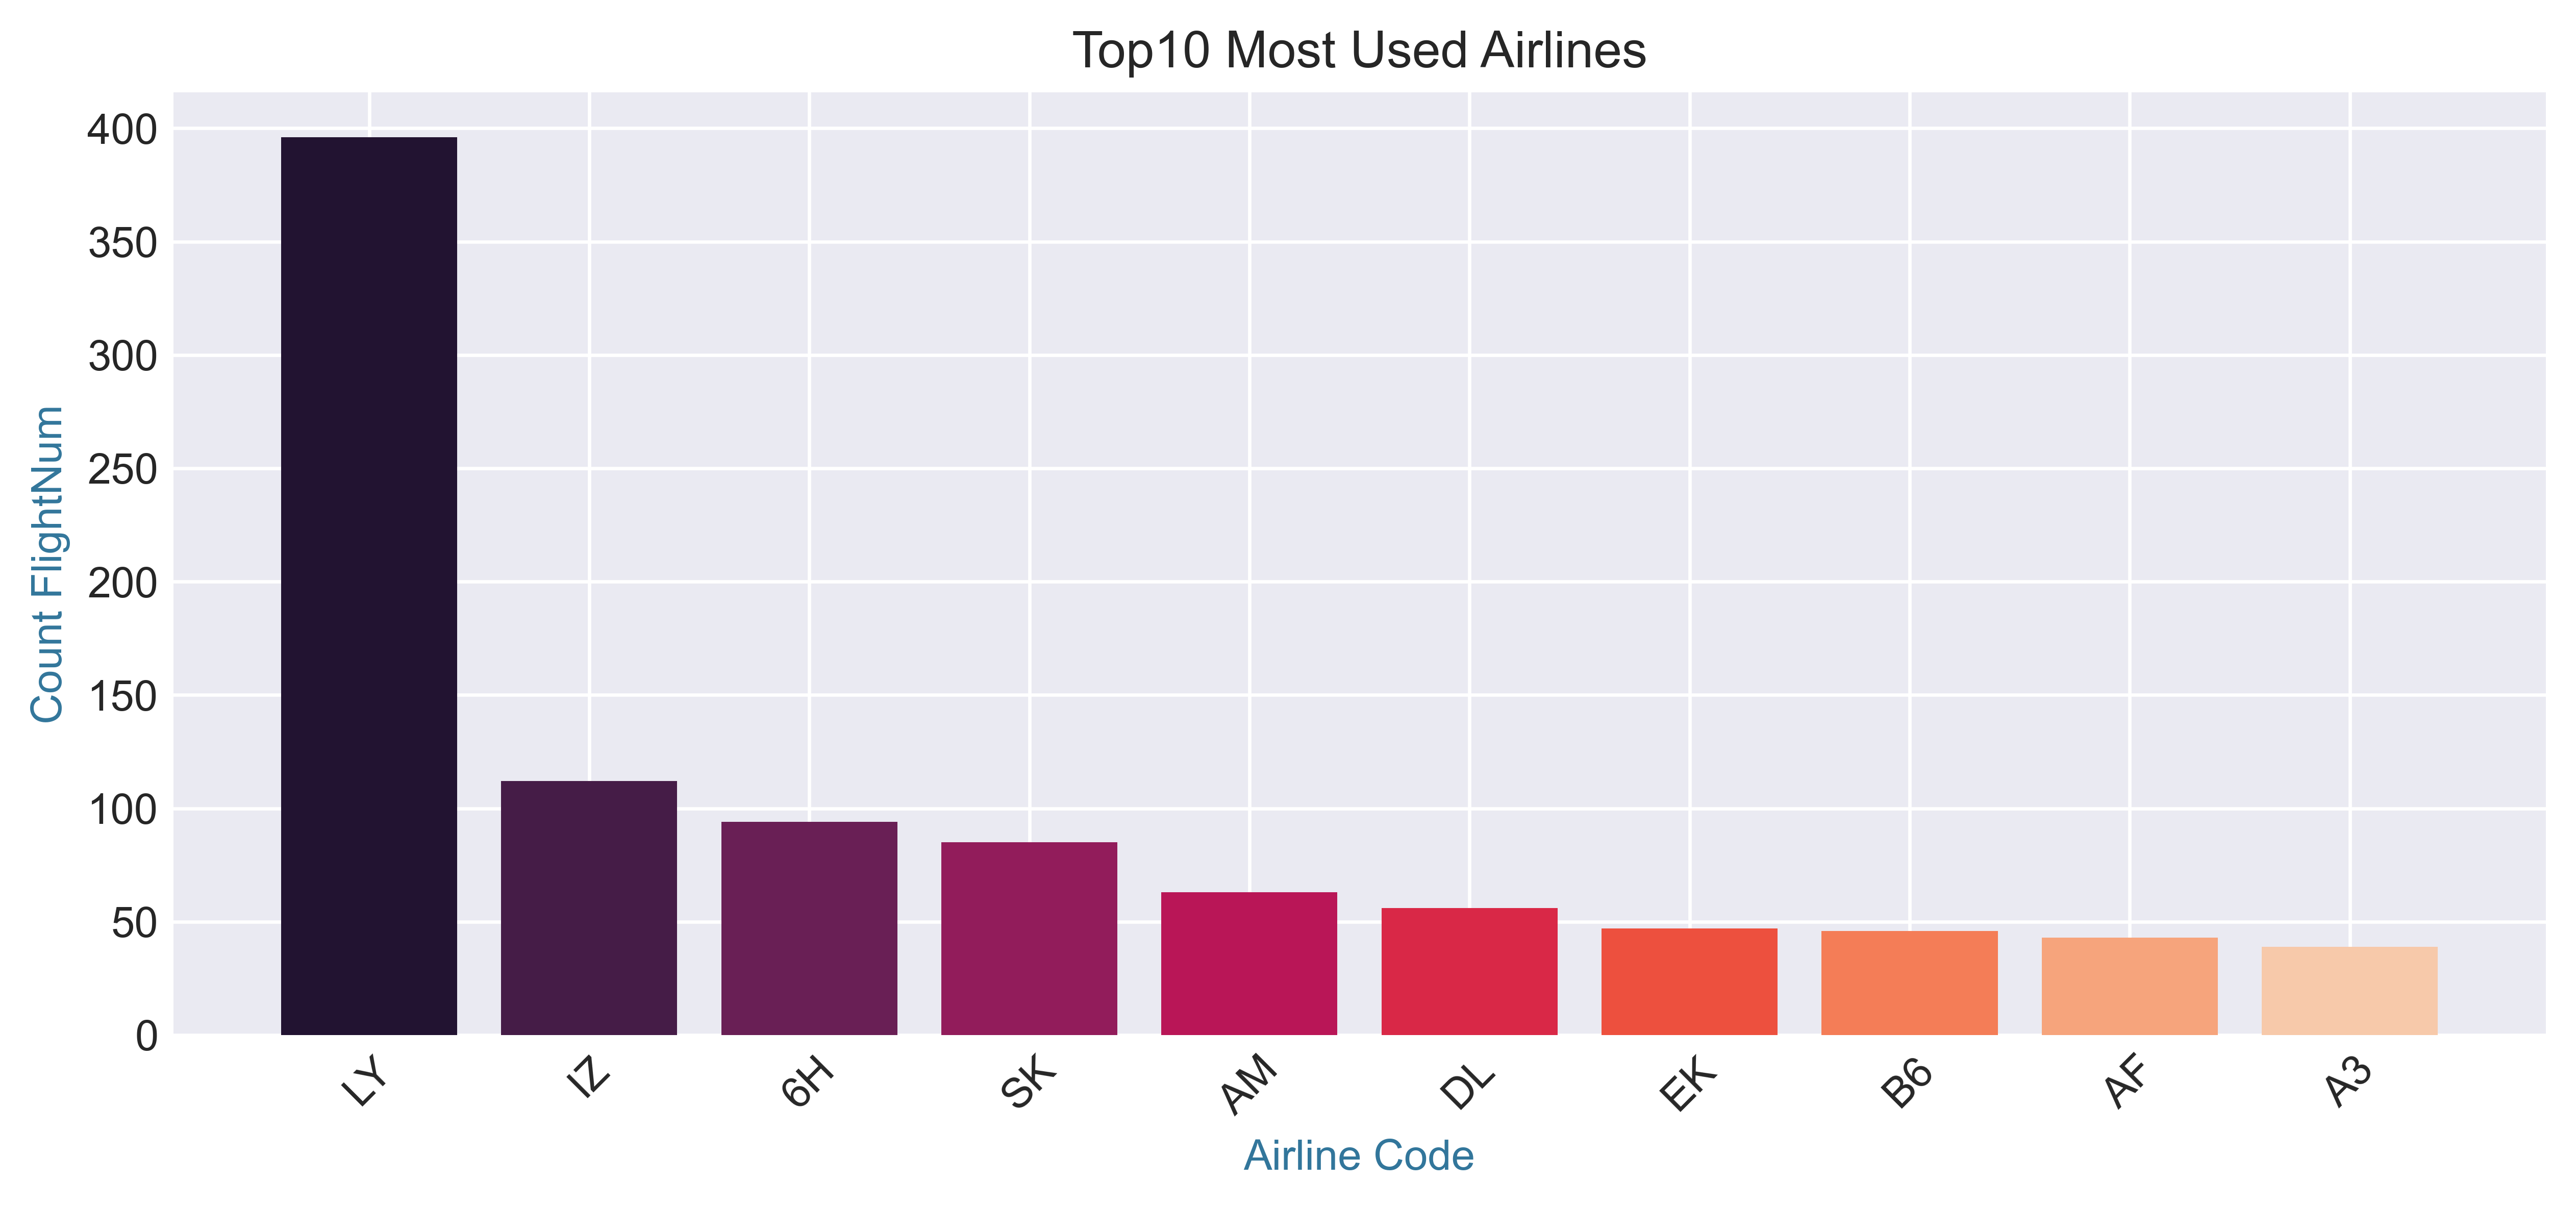

In [38]:
pallate_rocket=sb.color_palette('rocket',10)

plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(10,4),dpi=600)
plt.bar(Top10_F.index,Top10_F,color=pallate_rocket,label='Top10 Airlines')
plt.title('Top10 Most Used Airlines')
plt.xlabel('Airline Code',color='#32769B')
plt.ylabel('Count FlightNum',color='#32769B')
plt.xticks(rotation=45)

In [43]:
Status = Clean_Data_01_06_24[(Clean_Data_01_06_24.Status=='DEPARTED')]

In [ ]:
DEPARTED_DelayTime=Status.groupby('Airline')['DelayTime'].mean().sort_values(ascending=False)

In [63]:
Top10_DEPARTED_Avg_DelayTime=DEPARTED_DelayTime.head(10)

In [65]:
Top10_DEPARTED_Avg_DelayTime

Airline
KL    114.000000
CY     67.000000
JU     65.000000
AZ     65.000000
IZ     61.571429
SN     42.500000
LH     42.500000
AF     39.000000
LO     34.000000
W6     33.000000
Name: DelayTime, dtype: float64

In [53]:
Mean_DEPARTED_DelayTime=Status.groupby('Airline')['DelayTime'].mean().sort_values(ascending=False)
Max_DEPARTED_DelayTime=Status.groupby('Airline')['DelayTime'].max().sort_values(ascending=False)
Min_DEPARTED_DelayTime=Status.groupby('Airline')['DelayTime'].min().sort_values(ascending=False)

In [67]:
Mean_DEPARTED_DelayTime_Top10=Mean_DEPARTED_DelayTime.head(10)
Max_DEPARTED_DelayTime_Top10=Max_DEPARTED_DelayTime.head(10)
Min_DEPARTED_DelayTime_Top10=Min_DEPARTED_DelayTime.head(10)

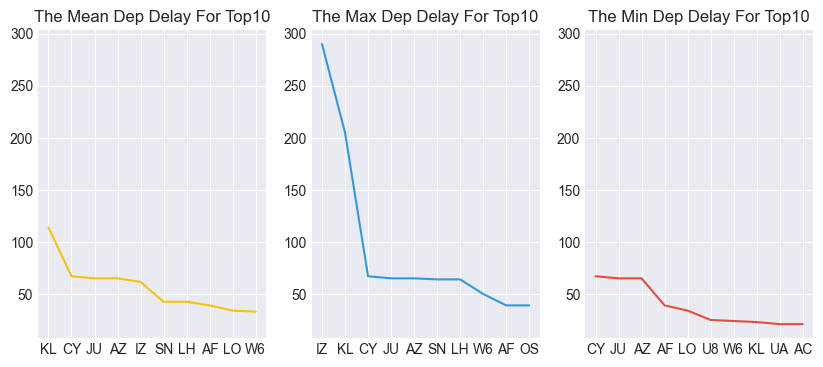

In [72]:
plt.figure(figsize=(10,4))
ax1 = plt.subplot(1,3,1)
plt.plot(Mean_DEPARTED_DelayTime_Top10,color='#f1c40f', label= 'Mean_DEP_DTime')
plt.title('The Mean Dep Delay For Top10')

plt.subplot(1,3,2,sharey=ax1)
plt.plot(Max_DEPARTED_DelayTime_Top10,color='#3498db', label= 'Max_DEP_DTime')
plt.title('The Max Dep Delay For Top10')

plt.subplot(1,3,3,sharey=ax1)
plt.plot(Min_DEPARTED_DelayTime_Top10,color='#e74c3c', label= 'Min_DEP_DTime')
plt.title('The Min Dep Delay For Top10')

plt.show()

In [76]:
pallate_rocket1=sb.color_palette('rocket',10)

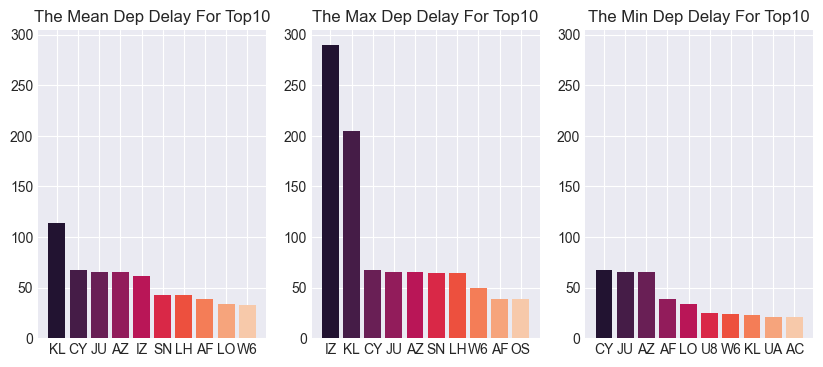

In [100]:
plt.figure(figsize=(10,4))
ax1 = plt.subplot(1,3,1)
plt.bar(Mean_DEPARTED_DelayTime_Top10.index,Mean_DEPARTED_DelayTime_Top10,data=Mean_DEPARTED_DelayTime_Top10.index,color=pallate_rocket1)
plt.title('The Mean Dep Delay For Top10')

plt.subplot(1,3,2,sharey=ax1)
plt.bar(Max_DEPARTED_DelayTime_Top10.index,Max_DEPARTED_DelayTime_Top10,data=Max_DEPARTED_DelayTime_Top10.index,color=pallate_rocket1)
plt.title('The Max Dep Delay For Top10')

plt.subplot(1,3,3,sharey=ax1)
plt.bar(Min_DEPARTED_DelayTime_Top10.index,Min_DEPARTED_DelayTime_Top10,data=Min_DEPARTED_DelayTime_Top10.index,color=pallate_rocket1)
plt.title('The Min Dep Delay For Top10')

plt.show()

In [7]:
Clean_Data_01_06_24['PlanHour'] = pd.to_datetime(Clean_Data_01_06_24["PlanTime"]).dt.hour
Clean_Data_01_06_24['ActualHour'] = pd.to_datetime(Clean_Data_01_06_24["ActualTime"]).dt.hour

In [17]:
plan_hour_delay = Clean_Data_01_06_24.groupby('PlanHour')['DelayTime'].mean().reset_index().sort_values(by='DelayTime',ascending=False)
actual_hour_delay = Clean_Data_01_06_24.groupby('ActualHour')['DelayTime'].mean().reset_index().sort_values(by='DelayTime',ascending=False)

C:\Users\ASUS1\AppData\Local\Temp\ipykernel_6604\2393703907.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='PlanHour', y='DelayTime', data=plan_hour_delay, palette='rocket')
C:\Users\ASUS1\AppData\Local\Temp\ipykernel_6604\2393703907.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='ActualHour', y='DelayTime', data=actual_hour_delay, palette='rocket')


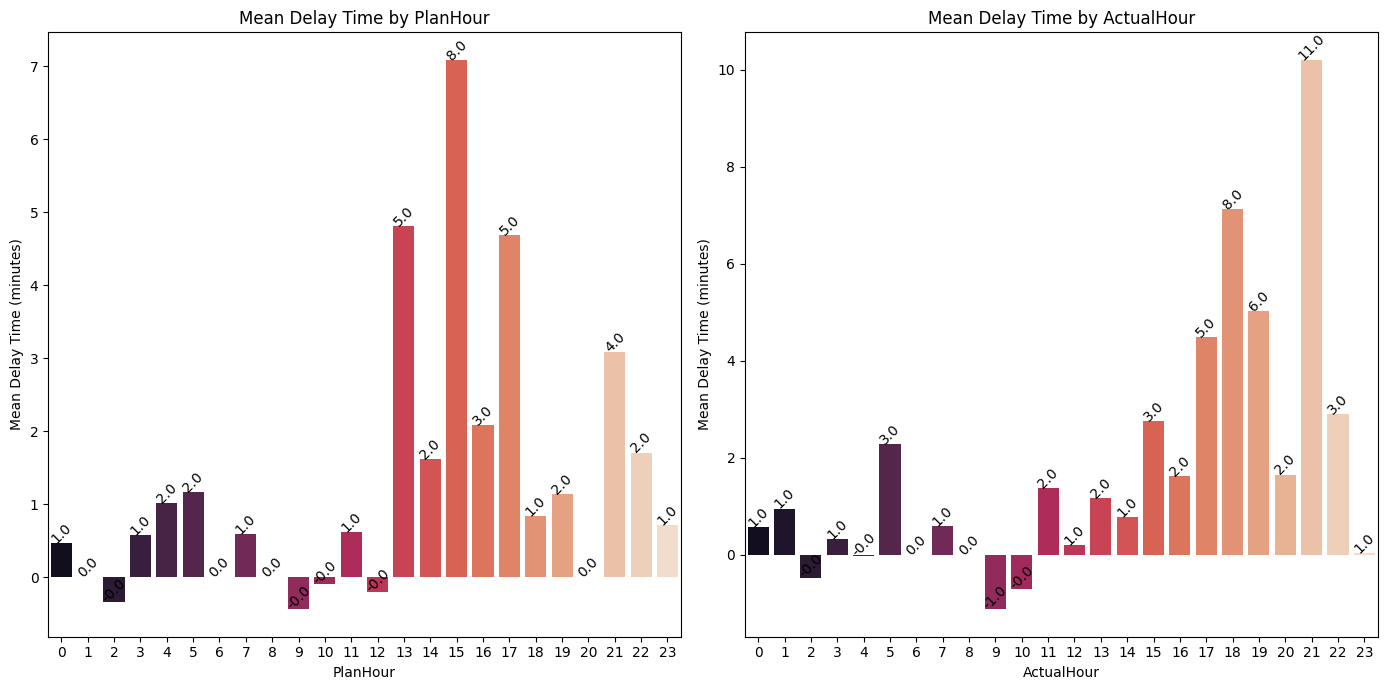

In [20]:

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sb.barplot(x='PlanHour', y='DelayTime', data=plan_hour_delay, palette='rocket')
plt.title('Mean Delay Time by PlanHour')
plt.xlabel('PlanHour')
plt.ylabel('Mean Delay Time (minutes)')
for i,j in zip(plan_hour_delay.PlanHour,plan_hour_delay.DelayTime):
    plt.annotate(str(np.ceil(j)),xy=(i,j),fontsize=10,color='#000000',ha='center',rotation=45 )

plt.subplot(1, 2, 2)
sb.barplot(x='ActualHour', y='DelayTime', data=actual_hour_delay, palette='rocket')
plt.title('Mean Delay Time by ActualHour')
plt.xlabel('ActualHour')
plt.ylabel('Mean Delay Time (minutes)')
for i,j in zip(actual_hour_delay.ActualHour,actual_hour_delay.DelayTime):
    plt.annotate(str(np.ceil(j)),xy=(i,j),fontsize=10,color='#000000',ha='center',rotation=45 )

plt.tight_layout()
plt.show()

In [ ]:
# insights :
# The highest mean delay time for planned flights is at 15:00 with 7 minutes delay time.
# #The highest mean delay time for actual flights is at 21:00 with 15 minutes delay time.

In [84]:
Top5_Peak_Hours=Clean_Data_01_06_24.groupby('ActualHour')['Airline'].count().sort_values(ascending=False).head(5)

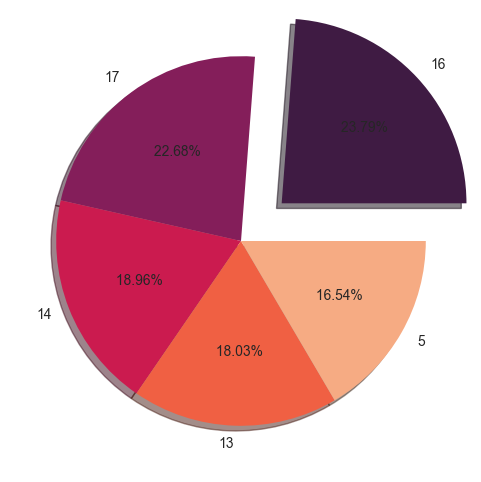

In [86]:
plt.figure(figsize=(6,6))
plt.pie(Top5_Peak_Hours,labels=Top5_Peak_Hours.index, autopct='% 1.2f%%',colors=pallate_rocket ,explode=(0.3,0,0,0,0),shadow=True)
plt.show()

In [ ]:
# insight:
# The peak hours are 16:00, 17:00, 14:00, 13:00, and 05:00.
# The highest peak hour is 16:00 with 23.79% of the total flights.